In [4]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

'%.3f'

In [5]:
from sklearn import linear_model

In [6]:
#zipファイルとファイルをダウンロードするためのライブラリ
#requests: Webのデータ送受信する
#zipfile: zip形式のファイルを読み書きする
#io: ファイルを読み書きする
import requests, zipfile
from io import StringIO
import io

In [7]:
# データがあるurlの指定
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# データをurlから取得する
r = requests.get(url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [9]:
student_data_math = pd.read_csv('student-mat.csv')
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [11]:
#区切りに「;」が使用されていることに注意
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [17]:
print(student_data_math['sex'].head())
print()
print(student_data_math['absences'].head())

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64


In [24]:
#groupby: 同じ値を持つデータをまとめて、それぞれの塊に対して共通の操作を行いたい時に使う
print(student_data_math.groupby('sex').mean())
print('------------')
print('------------')
print(student_data_math.groupby('sex')['age'].mean())

           age      Medu      Fedu  traveltime  studytime  failures    famrel  \
sex                                                                             
F    16.730769  2.668269  2.485577    1.408654   2.278846  0.302885  3.894231   
M    16.657754  2.839572  2.561497    1.491979   1.764706  0.368984  4.000000   

     freetime     goout      Dalc      Walc    health  absences         G1  \
sex                                                                          
F    3.009615  3.028846  1.254808  1.956731  3.365385  6.216346  10.620192   
M    3.486631  3.197861  1.732620  2.663102  3.764706  5.144385  11.229947   

            G2         G3  
sex                        
F    10.389423   9.966346  
M    11.074866  10.914439  
------------
------------
sex
F    16.730769
M    16.657754
Name: age, dtype: float64


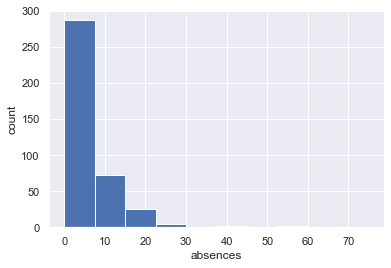

In [30]:
#histgram
plt.hist(student_data_math['absences'])

plt.xlabel('absences')
plt.ylabel('count')

plt.grid(True)

In [33]:
print('平均値：', student_data_math['absences'].mean())
print('中央値：', student_data_math['absences'].median())
print('最頻値：', student_data_math['absences'].mode())
print()

hoge = student_data_math['absences']
print('分散：', hoge.var())
print('標準偏差：', hoge.std())

平均値： 5.708860759493671
中央値： 4.0
最頻値： 0    0
dtype: int64

分散： 64.04954057700957
標準偏差： 8.00309568710818


In [34]:
#要約的統計量
hoge.describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [35]:
#四分位範囲（75%タイルー２５％タイル）
hoge.describe()[6]-hoge.describe()[4]

8.0

In [37]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


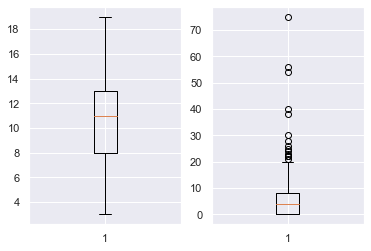

In [46]:
#箱ひげ図
plt.subplot(1,2,1)
plt.boxplot(student_data_math['G1'])
plt.grid(True)

plt.subplot(1,2,2)
plt.boxplot(student_data_math['absences'])
plt.grid(True)

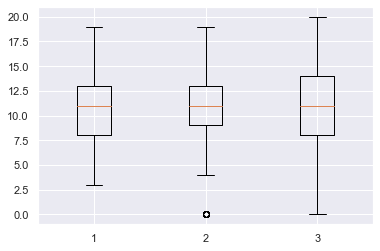

In [47]:
#箱ひげ図
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

In [48]:
#変動係数：欠損値
student_data_math['absences'].std()/student_data_math['absences'].mean()

1.4018726369879073

In [49]:
student_data_math.std()/student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

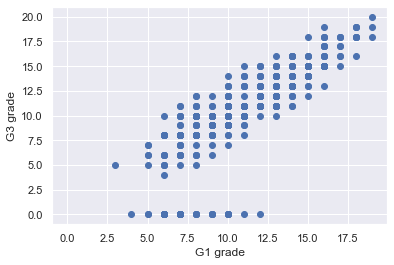

In [50]:
#散布図と相関係数
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.plot(True)

In [51]:
#共分散行列
#二組の変数の偏差の積の平均値
hoge = student_data_math
np.cov(hoge['G1'], hoge['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

In [52]:
#分散
print('G1の分散：', hoge['G1'].var())
print('G3の分散：', hoge['G3'].var())

G1の分散： 11.017053267364904
G3の分散： 20.989616397866733


In [55]:
#相関係数
#二つ目の値はp値
print(sp.stats.pearsonr(hoge['G1'], hoge['G3']))

#相関行列
print(np.corrcoef([hoge['G1'], hoge['G3']]))

(0.8014679320174141, 9.001430312277354e-90)
[[1.    0.801]
 [0.801 1.   ]]


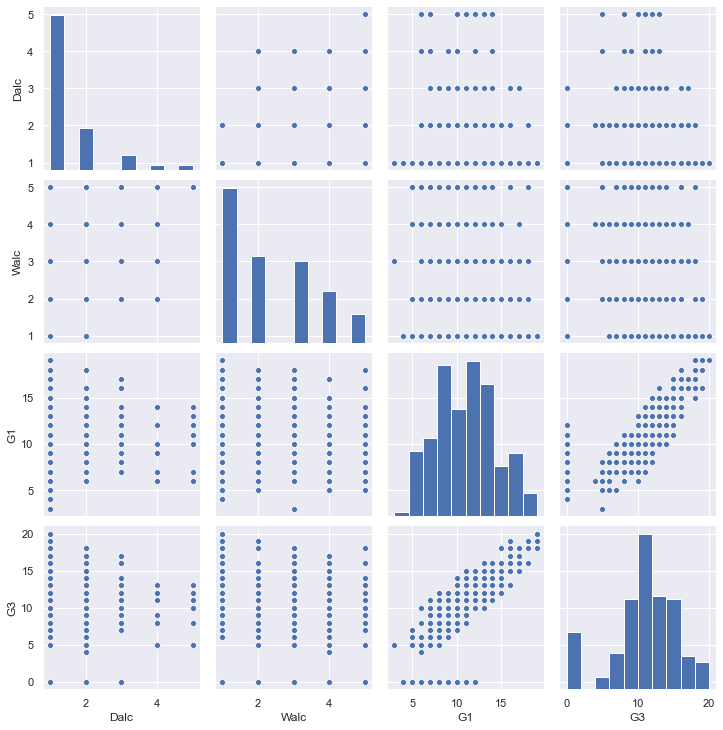

In [56]:
sns.pairplot(hoge[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [59]:
#practice 3-1
por = pd.read_csv('student-por.csv', sep=';')
por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [65]:
#practice 3-2
student_data_merge = pd.merge(student_data_math, por, on=['school','sex','age','address','famsize','Pstatus','Medu',
                                                         'Fedu','Mjob','reason','nursery','internet'],suffixes=('_math', '_por'))
student_data_merge.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,16.562963,2.812346,2.585185,1.441975,2.049383,0.288889,3.935802,3.222222,3.106173,1.481481,...,3.938272,3.229630,3.111111,1.486420,2.296296,3.600000,3.641975,12.098765,12.239506,12.525926
std,1.183262,1.091981,1.094893,0.692760,0.851633,0.729845,0.906974,0.979998,1.126234,0.894304,...,0.894782,0.977019,1.127953,0.894393,1.282445,1.395892,4.823387,2.549534,2.468499,2.911643
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


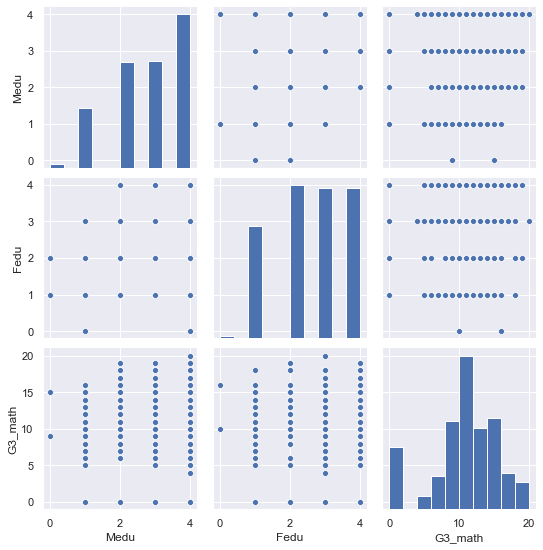

In [69]:
#practice 3-3
sns.pairplot(student_data_merge[['Medu','Fedu','G3_math']])

In [77]:
#線形単回帰分析
from sklearn import linear_model

#線形回帰のインスタンスを作成
reg = linear_model.LinearRegression()

X = student_data_math.loc[:, ['G1']].values
Y = student_data_math['G3'].values

reg.fit(X, Y)

print('回帰係数：', reg.coef_)
print('切片：', reg.intercept_)

回帰係数： [1.106]
切片： -1.6528038288004634


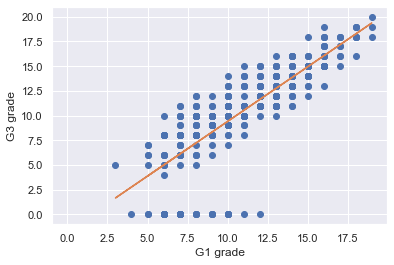

In [78]:
plt.scatter(X,Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.plot(True)

plt.plot(X, reg.predict(X))
plt.grid(True)

In [80]:
#決定係数
print('決定係数：', reg.score(X,Y))

決定係数： 0.6423508460522701


In [83]:
#practice 3-1
wine_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
wine_data.head()

In [110]:
print(wine_data.max())

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64


In [132]:
x = pd.concat([wine_data.max(), wine_data.min(), wine_data.mean(), wine_data.std()], axis=1)
x.columns = ['max', 'min', 'mean', 'std']
x

,max,min,mean,std
fixed acidity,15.90000,4.60000,8.319637,1.741096
volatile acidity,1.58000,0.12000,0.527821,0.179060
citric acid,1.00000,0.00000,0.270976,0.194801
residual sugar,15.50000,0.90000,2.538806,1.409928
chlorides,0.61100,0.01200,0.087467,0.047065
free sulfur dioxide,72.00000,1.00000,15.874922,10.460157
total sulfur dioxide,289.00000,6.00000,46.467792,32.895324
density,1.00369,0.99007,0.996747,0.001887
pH,4.01000,2.74000,3.311113,0.154386
sulphates,2.00000,0.33000,0.658149,0.169507


In [131]:
x.to_csv('wine_data_info.csv')
wine_data_info = pd.read_csv('wine_data_info.csv')
wine_data_info

,Unnamed: 0,max,min,mean,std
0,fixed acidity,15.90000,4.60000,8.319637,1.741096
1,volatile acidity,1.58000,0.12000,0.527821,0.179060
2,citric acid,1.00000,0.00000,0.270976,0.194801
3,residual sugar,15.50000,0.90000,2.538806,1.409928
4,chlorides,0.61100,0.01200,0.087467,0.047065
5,free sulfur dioxide,72.00000,1.00000,15.874922,10.460157
6,total sulfur dioxide,289.00000,6.00000,46.467792,32.895324
7,density,1.00369,0.99007,0.996747,0.001887
8,pH,4.01000,2.74000,3.311113,0.154386
9,sulphates,2.00000,0.33000,0.658149,0.169507


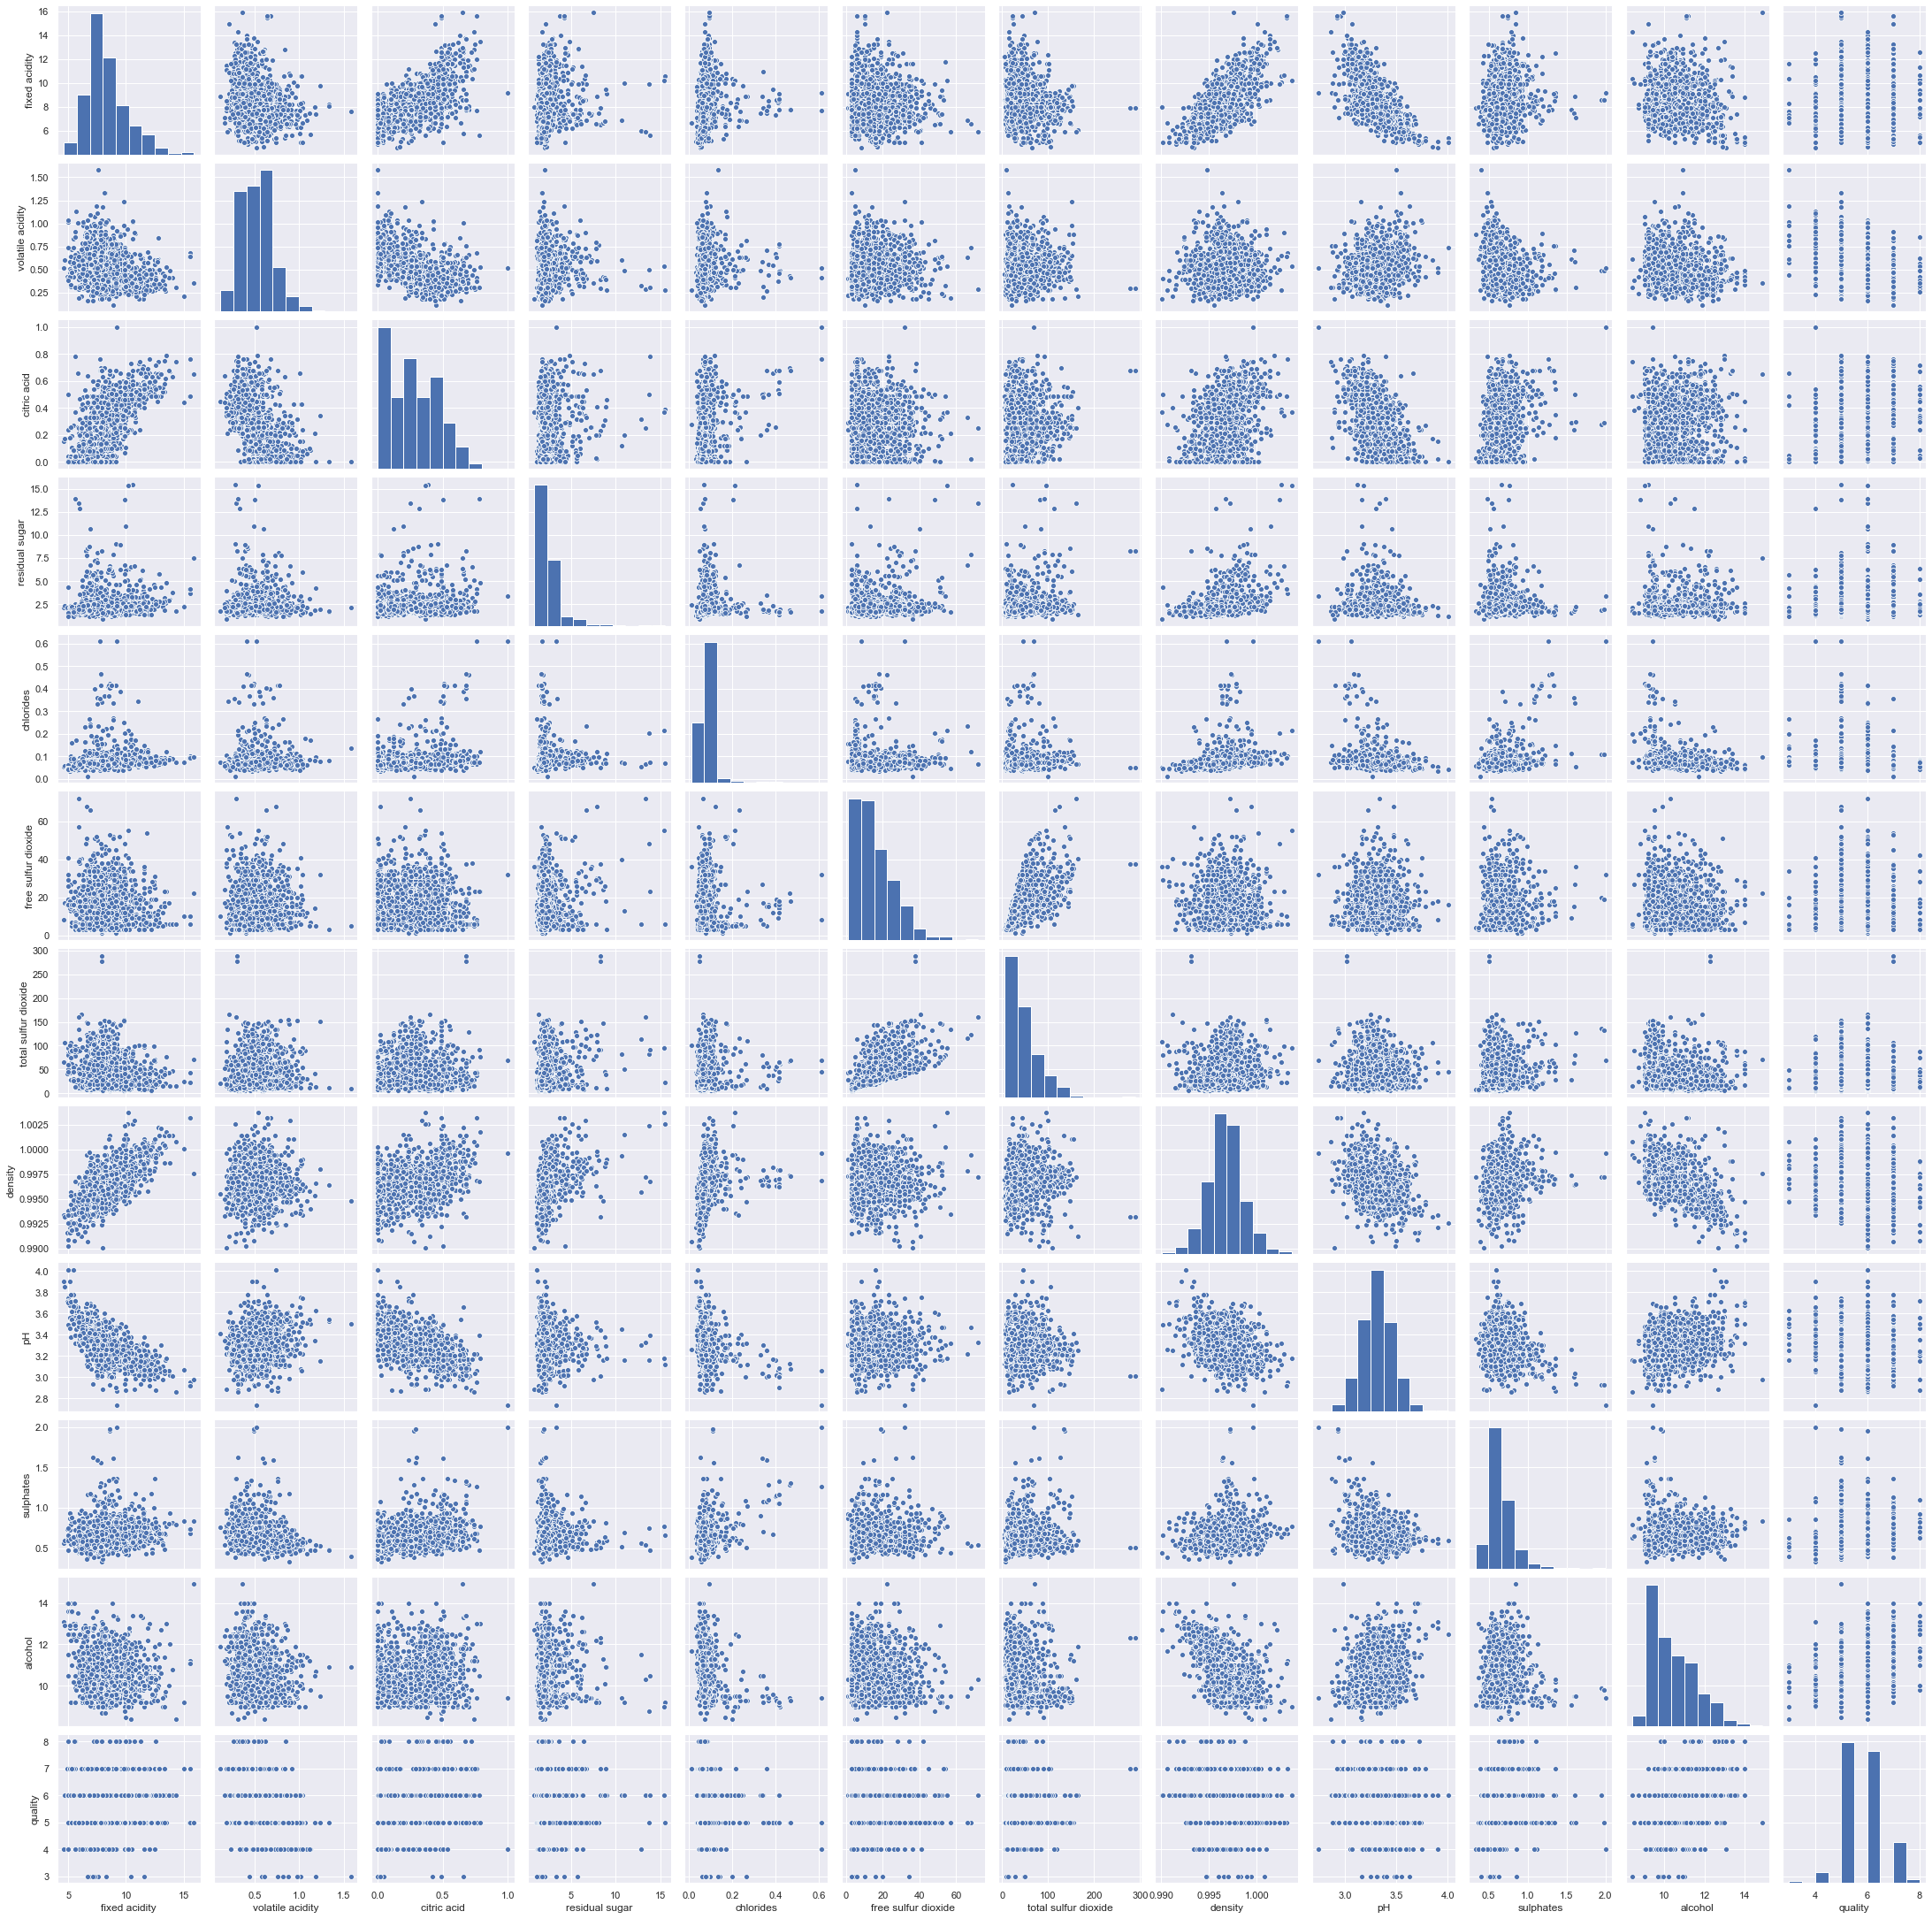

In [133]:
sns.pairplot(wine_data)

In [162]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
sort_data_F = student_data_math[student_data_math.sex == 'F'].G1.sort_values()
sort_data_M = student_data_math[student_data_math.sex == 'M'].G1.sort_values()

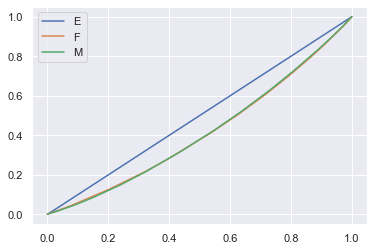

In [163]:
len_F = np.arange(len(sort_data_F))
len_M = np.arange(len(sort_data_M))

plt.plot(len_F/len_F.max(), len_F/len_F.max(), label='E')
plt.plot(len_F/len_F.max(), sort_data_F.cumsum()/sort_data_F.sum(), label='F')
plt.plot(len_M/len_M.max(), sort_data_M.cumsum()/sort_data_M.sum(), label='M')
plt.legend()
plt.grid(True)

In [167]:
#ジニ係数計算
def heikinsa(data):
    subt = []
    for i in range(0, len(data)-1):
        for j in range(i+1, len(data)):
            subt.append(np.abs(data[i] - data[j]))
    return float(sum(subt)*2/(len(data)**2))

def gini(heikinsa, data):
    return heikinsa / (2*np.mean(data))

print('男性の数学の平均に関するジニ係数：', gini(heikinsa(np.array(sort_data_M)), np.array(sort_data_M)))
print('女性の数学の平均に関するジニ係数：', gini(heikinsa(np.array(sort_data_F)), np.array(sort_data_F)))

男性の数学の平均に関するジニ係数： 0.17197351667939903
女性の数学の平均に関するジニ係数： 0.1723782950865341
